# TP2 - Electrocinétique en régime sinusoïdal, filtrage

## ARGUELLO Camilo

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython.display import display, Math

### Filtre RC

In [6]:
# 9)

# Pour G(v) = U_s_eff / U_e_eff
v = np.array([ 0.1, 0.2, 0.5, 0.51, 0.52, 0.53, 0.54, 1, 2, 5, 10, 20, 50, 100 ] ) # KHz 
U_e_eff = np.array([ 666, 656, 624, 621, 622, 621, 620, 596, 588, 584, 580, 590, 581, 584 ]) # mV
U_s_eff = np.array([ 135, 240, 435, 436, 440, 443, 446, 533, 571, 578, 588, 583, 585, 580 ]) # mV
G = U_s_eff / U_e_eff

# Pour phi = 2 * pi * ( dt / T )
dt = np.array([ 2.36 * 1000, 960, 246, 240, 230, 220, 220, 60, 20, 2, 0, 0, 0, 0 ]) # mu s
T = 1 / ( v / 1000)  # s
phi = 2 * np.pi * (dt / T)


## On valide si les arrays ont la même taille
arrs = [v, U_e_eff, U_s_eff, dt]
for i in range(1, len(arrs)):
    if len(arrs[i]) != len(arrs[i-1]):
        print("Les tableaux n'ont pas la même taille")

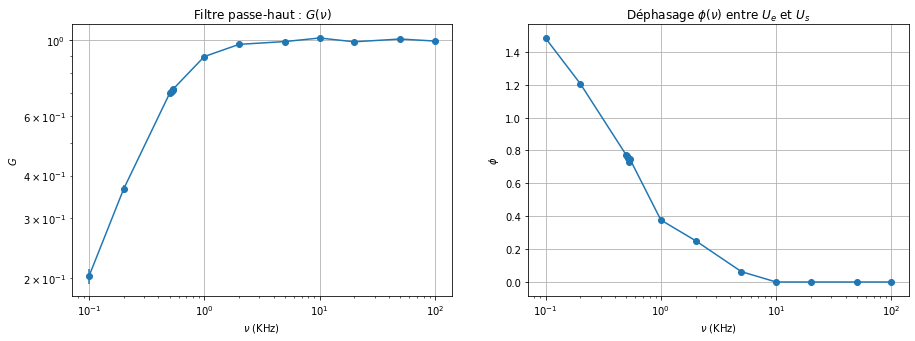

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# G en fonction de v en loglog
ax1.errorbar(v, G, yerr=0.01, fmt='o-')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$\nu$ (KHz)')
ax1.set_ylabel(r'$G$')
ax1.set_title(r'Filtre passe-haut : $G(\nu)$')
ax1.grid()

# phi en fonction de v en semilog
ax2.errorbar(v, phi, yerr=0.01, fmt='o-')
ax2.set_xscale('log')
ax2.set_xlabel(r'$\nu$ (KHz)')
ax2.set_ylabel(r'$\phi$')
ax2.set_title(r'Déphasage $\phi(\nu)$ entre $U_e$ et $U_s$')
ax2.grid()
plt.show()

# G_max
G_max = np.max(G)
display(Math(r'G_{max} = %.2f' % G_max))

# Valeur pour v_c quand G = G_max / sqrt(2)
v_c_G = v[np.abs(G - (G_max / np.sqrt(2))).argmin()]
display(Math(r'\text{Pour} \ G(\nu_c) = \frac{G_{max}}{\sqrt{2}}, \; \nu_c = %.2f \; \text{KHz}' % v_c_G))

# Valeur pour v_c quand phi = pi/4
v_c_phi = v[np.abs(phi - np.pi/4).argmin()]
display(Math(r'\text{Pour} \ \phi = \frac{\pi}{4}, \; \nu_c = %.2f \; \text{KHz}' % v_c_phi))

### Circuit RLC

#### Étude expérimentale